# Etapas

### Etapa 1: Análise Exploratória de Dados
- 1.1: Realizar Importação de Dados e Primeira Análise
- 1.2: Verificar Valores Nulos
- 1.3: Verificar Valores Únicos

### Etapa 2: Preparação de Dados
- 2.1: Unir Nomes
- 2.2: Criar a Coluna Tags
- 2.3: Processar Coluna Tags
- 2.4: Remover Stop Words
- 2.5: Aplicar Steeming
- 2.6: Count Vectorizer

### Etapa 3: Construção de Modelo de Similaridade de Cosseno
- 3.1: Construir Modelo
- 3.2: Criar Algoritmo de Recomendações
- 3.3: Criar Sustema de Recomendações Alternativo

# Etapa 1: Análise Exploratória de Dados

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re

### 1.1: Realizar Importação de Dados e Primeira Análise

In [2]:
disney_df = pd.read_csv('disney_plus_titles.csv')
disney_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [3]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


### 1.2: Verificar Valores Nulos

In [4]:
disney_df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

### 1.3: Verificar Valores Únicos

In [5]:
colunas_verificar = ['type', 'rating']

for coluna in colunas_verificar:
    valores_unicos = disney_df[coluna].unique()
    print(f"Valores únicos na coluna'{coluna}':'{valores_unicos}'")

Valores únicos na coluna'type':'['Movie' 'TV Show']'
Valores únicos na coluna'rating':'['TV-G' 'PG' 'TV-PG' nan 'PG-13' 'TV-14' 'G' 'TV-Y7' 'TV-Y' 'TV-Y7-FV']'


# Etapa 2: Preparação de Dados

In [6]:
disney_df_clean = disney_df.copy()

### 2.1: Unir Nomes

In [7]:
def unir_nomes(dataframe, colunas):
    dataframe[colunas] = dataframe[colunas].astype(str)
    for coluna in colunas:
        dataframe[coluna] = dataframe[coluna].apply(lambda x: ', '.join([nome.replace(' ', '') for nome in x.split(',')]))

In [8]:
unir_nomes(disney_df_clean, ['type', 'director', 'cast'])

In [9]:
disney_df_clean.head()  

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"AlonsoRamirezRamos, DaveWasson","ChrisDiamantopoulos, TonyAnselmo, TressMacNeil...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,JohnCherry,"JimVarney, NoelleParker, DouglasSeale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,KarenDisher,"RaymondAlbertRomano, JohnLeguizamo, DenisLeary...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,HamishHamilton,"DarrenCriss, AdamLambert, DerekHough, Alexande...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TVShow,The Beatles: Get Back,nan,"JohnLennon, PaulMcCartney, GeorgeHarrison, Rin...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### 2.2: Criar a Coluna Tags

In [10]:
def criar_coluna_tags(dataframe, colunas):
    dataframe[colunas] = dataframe[colunas].astype(str)
    dataframe['tags'] = dataframe[colunas].agg(" ".join, axis=1)

In [11]:
criar_coluna_tags(disney_df_clean, ['type', 'title', 'director', 'cast', 'release_year', 'description'])

In [12]:
disney_df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"AlonsoRamirezRamos, DaveWasson","ChrisDiamantopoulos, TonyAnselmo, TressMacNeil...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Movie Duck the Halls: A Mickey Mouse Christmas...
1,s2,Movie,Ernest Saves Christmas,JohnCherry,"JimVarney, NoelleParker, DouglasSeale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Movie Ernest Saves Christmas JohnCherry JimVar...
2,s3,Movie,Ice Age: A Mammoth Christmas,KarenDisher,"RaymondAlbertRomano, JohnLeguizamo, DenisLeary...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Movie Ice Age: A Mammoth Christmas KarenDisher...
3,s4,Movie,The Queen Family Singalong,HamishHamilton,"DarrenCriss, AdamLambert, DerekHough, Alexande...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Movie The Queen Family Singalong HamishHamilto...
4,s5,TVShow,The Beatles: Get Back,nan,"JohnLennon, PaulMcCartney, GeorgeHarrison, Rin...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,"TVShow The Beatles: Get Back nan JohnLennon, P..."


In [13]:
disney_df_clean['tags'][4]

'TVShow The Beatles: Get Back nan JohnLennon, PaulMcCartney, GeorgeHarrison, RingoStarr 2021 A three-part documentary from Peter Jackson capturing a moment in music history with The Beatles.'

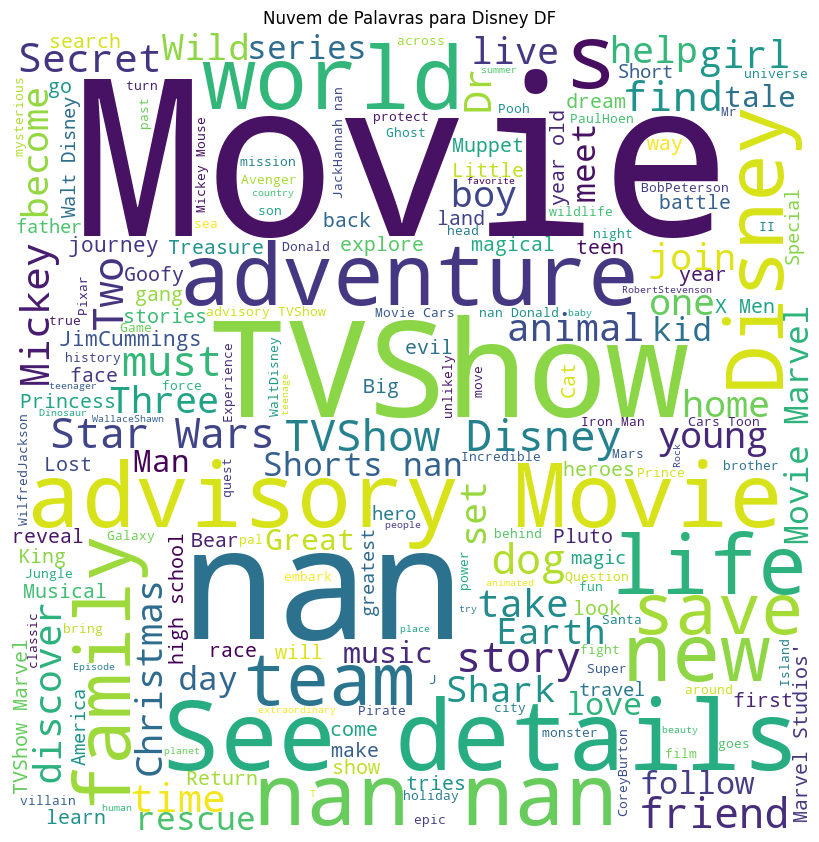

In [14]:
from wordcloud import WordCloud

# Juntar todas as tags para o alvo 0
tags_0 = ' '.join(disney_df_clean['tags'])

# Gerar nuvem de palavras para o alvo 0
nuvem_palavras_0 = WordCloud(width=800, height=800, 
                             background_color='white', 
                             stopwords=None, 
                             min_font_size=10).generate(tags_0)

# Plotar nuvem de palavras para o alvo 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(nuvem_palavras_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Nuvem de Palavras para Disney DF')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('nuvem_palavras_alvo_0.png', bbox_inches='tight')

plt.show()

Essa é uma nuvem de palavras da coluna "tags" sem nenhum tipo de processamento. Como podemos observar, não existe padrão gramatical nas tags, além de existir diversas tags que não são muito relevantes nesse caso.

### 2.3: Processar Coluna Tags

In [15]:
def processar_tags(tags):
    # Remover URLs
    tags = re.sub(r"\b(nan|See details for advisory)\b", "", tags)
    # Substitui todos os caracteres não alfabéticos e não numéricos por espaços
    tags = re.sub(r"[^a-zA-Z0-9\s]", "", tags)
    # Substitui múltiplos espaços por um único espaço
    tags = re.sub(r'\s+', ' ', tags)
    # Converte o texto para minúsculas
    tags = tags.lower()
    return tags

In [16]:
def aplicar_processar_tags(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(processar_tags)

In [17]:
aplicar_processar_tags(disney_df_clean, 'tags')

In [18]:
disney_df_clean['tags'].head()

0    movie duck the halls a mickey mouse christmas ...
1    movie ernest saves christmas johncherry jimvar...
2    movie ice age a mammoth christmas karendisher ...
3    movie the queen family singalong hamishhamilto...
4    tvshow the beatles get back johnlennon paulmcc...
Name: tags, dtype: object

In [19]:
disney_df_clean['tags'][4]

'tvshow the beatles get back johnlennon paulmccartney georgeharrison ringostarr 2021 a threepart documentary from peter jackson capturing a moment in music history with the beatles'

### 2.4: Remover Stop Words

In [20]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yamas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remover_stopwords(texto):
    palavras = texto.split()
    palavras_filtradas = [palavra for palavra in palavras if palavra not in stop_words]
    return ' '.join(palavras_filtradas)

In [22]:
def aplicar_remover_stopwords(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(remover_stopwords)

In [23]:
aplicar_remover_stopwords(disney_df_clean, 'tags')

In [24]:
disney_df_clean['tags'].head()

0    movie duck halls mickey mouse christmas specia...
1    movie ernest saves christmas johncherry jimvar...
2    movie ice age mammoth christmas karendisher ra...
3    movie queen family singalong hamishhamilton da...
4    tvshow beatles get back johnlennon paulmccartn...
Name: tags, dtype: object

In [25]:
disney_df_clean['tags'][4]

'tvshow beatles get back johnlennon paulmccartney georgeharrison ringostarr 2021 threepart documentary peter jackson capturing moment music history beatles'

### 2.5: Gerar Word Cloud

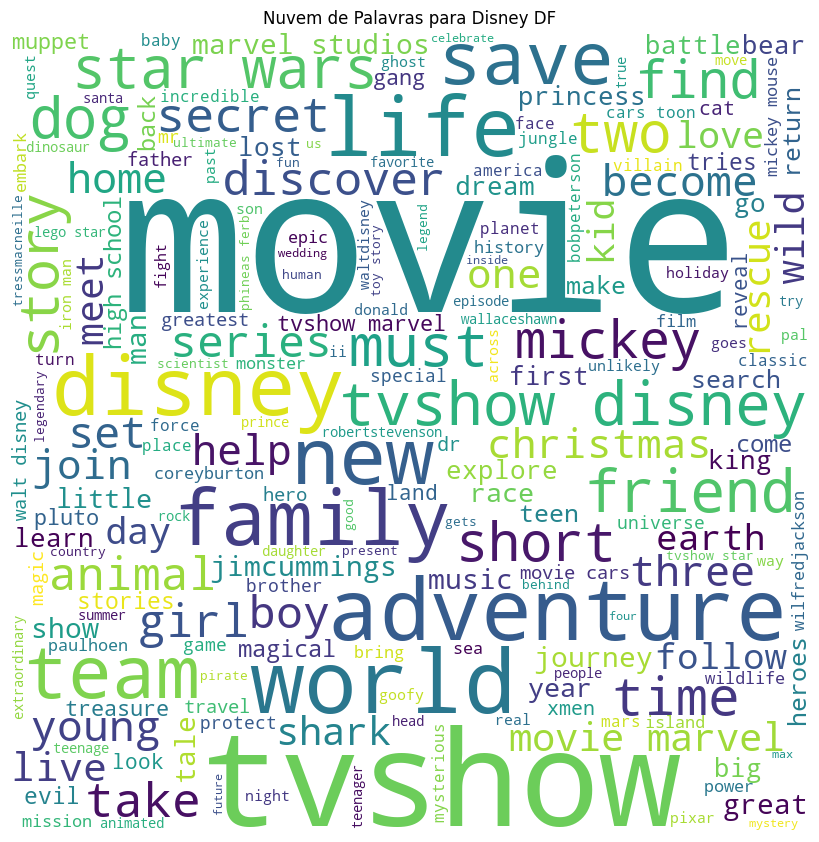

In [26]:
# Juntar todas as tags para o alvo 0
tags_0 = ' '.join(disney_df_clean['tags'])

# Gerar nuvem de palavras para o alvo 0
nuvem_palavras_0 = WordCloud(width=800, height=800, 
                             background_color='white', 
                             stopwords=None, 
                             min_font_size=10).generate(tags_0)

# Plotar nuvem de palavras para o alvo 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(nuvem_palavras_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Nuvem de Palavras para Disney DF')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('nuvem_palavras_alvo_0.png', bbox_inches='tight')

plt.show()

Agora podemos ver que nossas tags estão padronizadas, e estão carregando muito mais significado individualmente.

### 2.6: Aplicar Steeming

In [27]:
from nltk.stem import PorterStemmer

# Inicializa o stemmer
stemmer = PorterStemmer()

In [28]:
def stemming(texto):
    palavras = texto.split()
    palavras_stem = [stemmer.stem(palavra) for palavra in palavras]
    return ' '.join(palavras_stem)

In [29]:
def aplicar_stemming(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(stemming)

In [30]:
aplicar_stemming(disney_df_clean, 'tags')

In [31]:
disney_df_clean['tags'].head()

0    movi duck hall mickey mous christma special al...
1    movi ernest save christma johncherri jimvarney...
2    movi ice age mammoth christma karendish raymon...
3    movi queen famili singalong hamishhamilton dar...
4    tvshow beatl get back johnlennon paulmccartney...
Name: tags, dtype: object

In [32]:
disney_df_clean['tags'][4]

'tvshow beatl get back johnlennon paulmccartney georgeharrison ringostarr 2021 threepart documentari peter jackson captur moment music histori beatl'

### 2.7: Count Vectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [34]:
vector = vectorizer.fit_transform(disney_df_clean['tags']).toarray()

# Etapa 3: Construção de Modelo de Similaridade de Cosseno

### 3.1: Construir Modelo

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between vectors
similarity = cosine_similarity(vector)

In [36]:
similarity.shape

(1450, 1450)

### 3.2: Criar Sistema de Recomendações

In [37]:
def recomendar(filme):
    index = disney_df_clean[disney_df_clean['title'] == filme].index[0]
    distancia = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distancia[1:11]:
        print(disney_df_clean.iloc[i[0]].title)

In [38]:
recomendar('Home Alone')

Home Alone 2: Lost in New York
Home Sweet Home Alone
Home Alone 3
I'll Be Home for Christmas
Dragon Around
America's Funniest Home Videos
Pluto's Christmas Tree
In Beaver Valley
Captain Sparky vs. The Flying Saucers
Mrs. Doubtfire


In [39]:
recomendar("101 Dalmatians")

102 Dalmatians
Cruella
101 Dalmatians II: Patch's London Adventure
101 Dalmatian Street
Puppy for Hanukkah
101 Dalmatians (Series)
Melody Time
Alice in Wonderland
Cinderella
Beach Picnic


In [40]:
recomendar("X-Men")

X2
X-Men: Evolution
X-Men: Days of Future Past
X-Men Origins: Wolverine
X-Men: The Last Stand
X-Men: First Class
X-Men: Apocalypse
Marvel Comics X-Men
X-Men: Dark Phoenix
Simpsons Movie


### 3.3: Criar Sistema de Recomendações Alternativo

In [41]:
from fuzzywuzzy import process

def recomendar_alternativo(filme):
    filme = filme.lower()  # Padroniza o título inserido
    # Cria uma lista com os títulos do dataframe
    titles = disney_df_clean['title'].tolist()

    # Encontra o título mais próximo usando fuzzywuzzy
    best_match, score = process.extractOne(filme, titles)

    # Se o score for alto o suficiente (exemplo, 80 ou mais), pega o índice do filme
    if score > 50:
        matching_filmes = disney_df_clean[disney_df_clean['title'] == best_match]
        index = matching_filmes.index[0]
        distancia = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
        
        for i in distancia[1:11]:
            print(disney_df_clean.iloc[i[0]].title)
    else:
        print("Nenhum título encontrado com um bom grau de correspondência.")


c:\Users\yamas\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [42]:
recomendar_alternativo("Star wOrs")

LEGO Star Wars Holiday Special
Tick Tock Tale
LEGO Star Wars: The New Yoda Chronicles - Clash of the Skywalkers
LEGO Star Wars: Droid Tales
Star Wars Biomes
Mickey's Tale of Two Witches
Star Wars Vintage: Story of the Faithful Wookiee
Star Wars Vehicle Flythroughs
Star Wars: Visions
LEGO Star Wars: The Freemaker Adventures


In [43]:
recomendar_alternativo("toi estori")

Toy Story 3
Toy Story 2
Toy Story Toons: Small Fry
Toy Story of Terror!
Toy Story: That Time Forgot
Toy Story 4
Toy Story Toons: Hawaiian Vacation
Toy Story Toons: Partysaurus Rex
Tin Toy
Incredible! The Story of Dr. Pol
